# Data Analyst Case do Ifood

https://github.com/ifood/ifood-data-analyst-case

Queremos entender:

* que tipo de usuário aceita "na primeira", segunda, terceira oferta, etc.
* tratar as informações e tirar insights

Segundo passo (preditivo)
* se formos mandar uma nova campanha, para qual público seria melhor enviarmos? 
* mais adiante queremos saber qual é o melhor grupo para enviar uma campanha




## Do PDF, temos:


1. Qtdade de clientes: "de 100 a 900 mil usuários registrados".
2. Atendem aprox 1 milhão de usuários por ano.
3. Produtos em 5 principais categorias (sendo separados posteriormente em 'gold and regular products'): 
    * 'wines, 
    * rare meat products, 
    * exotic fruits, 
    * specially prepared fish and 
    * sweet products '
4. Canais de compra: 3 sales channels: physical stores, catalogs and the company’s website.
5. Contexto do problema:
    * "Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but 
        * the profit growth perspectives for the next 3 years are not promising... 
        For this reason, several strategic initiatives are being considered to invert this situation. 
            * One is to **improve the performance of marketing activities**, with a special focus on marketing campaigns."

**OBJETIVO:**
* Criar uma análise para retornar o melhor lucro, na campanha do próximo mês. 
* Campanha piloto (oferece a venda de um gadget para compra):
    * 2240 customers
    * valor total da campanha: 6720MU
    * receita gerada pelos clientes que aceitaram a oferta: 3674MU
    * lucro líquido = -3046MU
    * taxa de sucesso: 15%


# Código

In [74]:
import numpy as np 
import seaborn as sns
import pandas as pd
from datetime import datetime
pd.options.display.max_rows=100
pd.options.display.max_columns=100

#eliminando future warnings (ref: https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
""" import decouple
from decouple import config 
#dataFrameSource = config('CSV') """

" import decouple\nfrom decouple import config \n#dataFrameSource = config('CSV') "

In [76]:
df = pd.read_csv('/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/data/raw/retail_case_data.csv')

# 01.. Explorando df

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [78]:
# testando uso de groupby
df.groupby(['Kidhome'])['Income'].mean()/12

Kidhome
0    5148.321512
1    3261.506389
2    3262.458333
Name: Income, dtype: float64

## Procurando por nulos

In [79]:
df.isnull().sum().sort_values(ascending=False)
#identificamos 24 elementos nulos em 'Income'

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

## Vamos criar uma regressão para preencher os dados faltantes no campo "income"

In [80]:
print('Mínimo: ', df['Income'].min())
print('Média: ', df['Income'].mean())
print('Máximo: ', df['Income'].max())

Mínimo:  1730.0
Média:  52247.25135379061
Máximo:  666666.0


Plotando boxplot para 'Income'

<AxesSubplot:xlabel='Income'>

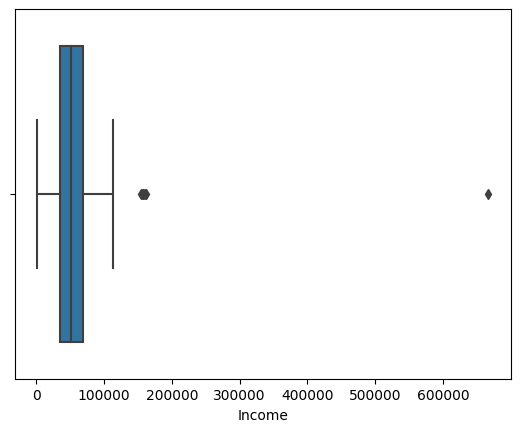

In [81]:

ax = sns.boxplot(x = 'Income', data = df)
ax

<AxesSubplot:xlabel='Income', ylabel='Count'>

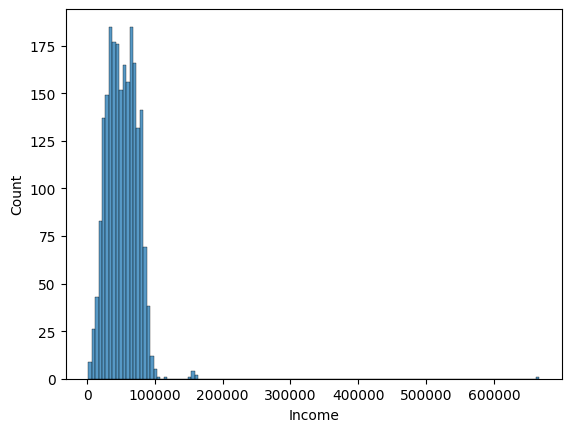

In [82]:
ax = sns.histplot(x = 'Income', data = df)
ax

In [83]:
df.sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,5079,1971,Graduation,Married,NaN,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
2079,10339,1954,Master,Together,NaN,0,1,2013-06-23,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2081,3117,1955,Graduation,Single,NaN,0,1,2013-10-18,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1


In [84]:
# Iremos eliminar a observação com o outlier de salário "exorbitante"

In [85]:
#removido diretamente através do índice:
df.drop(2233, inplace=True)

In [86]:
df.head(20).sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


## Adicionando colunas extras

### Criando coluna de renda mensal: 'IncomeMonth'

In [87]:
df['IncomeMonth']=df['Income']/12

In [88]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'IncomeMonth'],
      dtype='object')

### Criando coluna de total de campanhas aceitas:'TotAcceptedCmp'

In [89]:
# total campanhas aceitas: TotAcceptedCmp
df['TotAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [90]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeMonth,TotAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4844.833333,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3862.000000,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,5967.750000,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2220.500000,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4857.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,5101.916667,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,5334.500000,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,4748.416667,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,5770.416667,0


### Criando coluna de idade: 'Age'

Considerando a data mais recente do registro do cliente no sistema como a data de quando df foi gerado, iremos estimar a idade do cliente:

In [91]:
df['Dt_Customer'].max()

'2014-06-29'

In [92]:
df['Age'] = 2014 - df['Year_Birth']

In [93]:
df.drop(columns=['Year_Birth'], inplace=True)

### Criando coluna de dias registrados: 'Days_Registered'

In [94]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Education            2239 non-null   object        
 2   Marital_Status       2239 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2239 non-null   int64         
 5   Teenhome             2239 non-null   int64         
 6   Dt_Customer          2239 non-null   datetime64[ns]
 7   Recency              2239 non-null   int64         
 8   MntWines             2239 non-null   int64         
 9   MntFruits            2239 non-null   int64         
 10  MntMeatProducts      2239 non-null   int64         
 11  MntFishProducts      2239 non-null   int64         
 12  MntSweetProducts     2239 non-null   int64         
 13  MntGoldProds         2239 non-nul

In [96]:
df["Days_Registered"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

In [97]:
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeMonth,TotAcceptedCmp,Age,Days_Registered
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4844.833333,0,57,663
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3862.000000,0,60,113
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,5967.750000,0,49,312
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2220.500000,0,30,139
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4857.750000,0,33,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,5101.916667,0,47,381
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,5334.500000,1,68,19
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,4748.416667,1,33,155
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,5770.416667,0,58,156


## Eliminando colunas com valores constantes

In [98]:
df["Z_Revenue"].value_counts()

11    2239
Name: Z_Revenue, dtype: int64

In [99]:
df["Z_CostContact"].value_counts()

3    2239
Name: Z_CostContact, dtype: int64

In [100]:
df.drop(columns=["Z_Revenue", "Z_CostContact"], inplace=True)

In [101]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'IncomeMonth', 'TotAcceptedCmp', 'Age',
       'Days_Registered'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Education            2239 non-null   object        
 2   Marital_Status       2239 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2239 non-null   int64         
 5   Teenhome             2239 non-null   int64         
 6   Dt_Customer          2239 non-null   datetime64[ns]
 7   Recency              2239 non-null   int64         
 8   MntWines             2239 non-null   int64         
 9   MntFruits            2239 non-null   int64         
 10  MntMeatProducts      2239 non-null   int64         
 11  MntFishProducts      2239 non-null   int64         
 12  MntSweetProducts     2239 non-null   int64         
 13  MntGoldProds         2239 non-nul

## Convertendo variáveis categóricas para numéricas: 'LabelEncoder'

In [103]:
# buscando variáveis categóricas:

# definindo uma funcao onde informamos a quantidade de valores únicos mínimos para ser considerada categórica
def listaCategoricas(df, uniqueMax):
    varCategoricas = []
    for i in df.columns:
       if (len(df[i].unique()) < uniqueMax) & (df[i].dtype == 'object'):
          varCategoricas.append(i)
    return varCategoricas

varCategoricas = listaCategoricas(df, 26)
varCategoricas

['Education', 'Marital_Status']

In [104]:
#vamos fazer o LabelEncoder das variaveis categoricas (ref:https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [105]:
for i in varCategoricas:
    tempString = i + '_Cat'
    print(tempString)
    df[tempString] = labelencoder.fit_transform(df[i])


Education_Cat
Marital_Status_Cat


In [106]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,IncomeMonth,TotAcceptedCmp,Age,Days_Registered,Education_Cat,Marital_Status_Cat
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,4844.833333,0,57,663,2,4
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,3862.000000,0,60,113,2,4
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,5967.750000,0,49,312,2,5
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2220.500000,0,30,139,2,5
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,4857.750000,0,33,161,4,3


# 02.. Preenchendo elementos faltantes em Income: regressão linear

In [107]:
# armazenando elementos eliminando os nulos de "Income"
dfTreino = df[~df['Income'].isnull()] #treino: com elementos completos
dfEstimar = df[df['Income'].isnull()] #estimar: com elementos de income faltantes

## Correlação: 

Mostrando correlação dos elementos com a variável "Income"

In [108]:
dfTreino.corr()['Income'].sort_values()

NumWebVisitsMonth     -0.650564
Kidhome               -0.514935
NumDealsPurchases     -0.108457
Complain              -0.030583
Days_Registered       -0.024126
AcceptedCmp3          -0.015286
ID                     0.000064
Recency                0.006945
Marital_Status_Cat     0.009737
Teenhome               0.034363
AcceptedCmp2           0.103909
Education_Cat          0.145694
Response               0.161049
Age                    0.198064
AcceptedCmp4           0.219337
AcceptedCmp1           0.327167
TotAcceptedCmp         0.366384
MntGoldProds           0.389204
AcceptedCmp5           0.396571
NumWebPurchases        0.458812
MntFruits              0.507959
MntFishProducts        0.520351
MntSweetProducts       0.523746
NumStorePurchases      0.630397
MntWines               0.688269
MntMeatProducts        0.692465
NumCatalogPurchases    0.696541
IncomeMonth            1.000000
Income                 1.000000
Name: Income, dtype: float64

Aplicando filtro para obter somente aqueles com correlação superior ao módulo de '0.5'

In [109]:
filtro_corr = dfTreino.corr()['Income'][(dfTreino.corr()['Income'] > 0.5) | (dfTreino.corr()['Income'] < -0.5)].sort_values()

#df.corr()['Response'][(df.corr()['Response'] > .15) | (df.corr()['Response'] < -.15)].sort_values(ascending = False)

# !!! PERGUNTA 2022-09-05:
como obter os elementos diretamente e gerar o heatmap a partir do filtro?
filtro_corr é uma série.
posso obter os rótulos usando .keys()
mas como posso incorporar no heatmap?
como represento uma série e como represento um dataframe? [[]]

In [110]:
filtro_corr.keys()

Index(['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts',
       'NumCatalogPurchases', 'IncomeMonth', 'Income'],
      dtype='object')

<AxesSubplot:>

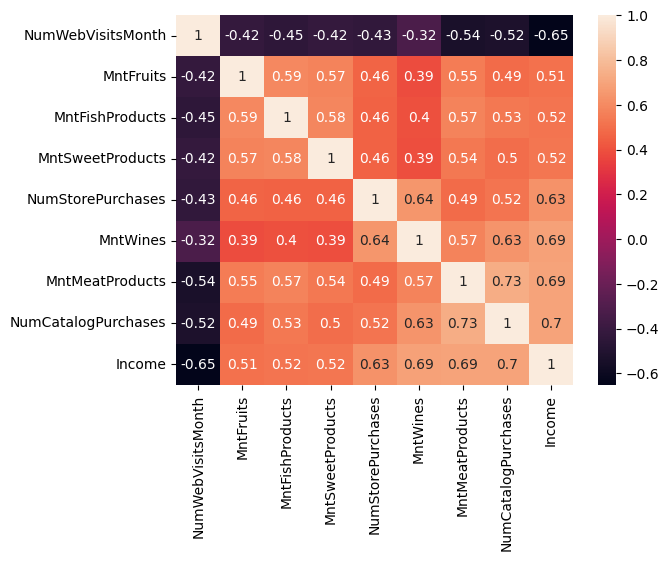

In [111]:
# Gerando grafico de correlação:
dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']].corr()

#Podemos gerar um mapa de calor com o Seaborn
sns.heatmap(dfTreino[['NumWebVisitsMonth', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Income']].corr()
, annot = True)


Devemos procurar manter a continuidade das features, evitando que pareçam com variáveis categóricas.
Como por exemplo a feature "Kidhome", que varia de de 0 a 2:

In [112]:
listaElementos = ['NumWebVisitsMonth', 
                 'MntFruits', 
                 'MntFishProducts', 
                 'MntSweetProducts', 
                 'NumStorePurchases', 
                 'MntWines' 
                 #'MntMeatProducts' 
                 #'NumCatalogPurchases'
                 ]
for i in listaElementos:
    print(i)
    print(len(dfTreino[i].unique()))
    print(dfTreino[i].value_counts())
    print('============\n')

NumWebVisitsMonth
16
7     387
8     340
6     334
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64

MntFruits
158
0      395
1      158
2      119
3      114
4      103
      ... 
130      1
164      1
189      1
101      1
154      1
Name: MntFruits, Length: 158, dtype: int64

MntFishProducts
182
0      379
2      152
3      128
4      108
6       81
      ... 
164      1
232      1
247      1
167      1
229      1
Name: MntFishProducts, Length: 182, dtype: int64

MntSweetProducts
176
0      413
1      160
2      123
3      101
4       80
      ... 
146      1
132      1
167      1
99       1
111      1
Name: MntSweetProducts, Length: 176, dtype: int64

NumStorePurchases
14
3     483
4     319
2     220
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: NumStorePurchases, dtype: int64

MntWines
776
2   

## 02.b - procurando multicolinearidade

É importante escolhermos as features relevantes para predizer nosso target, "Income".
Pra isso, precisamos evitar variáveis que apresentem multicolinearidade (https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f). 
Para corrigir multicolinearidade podemos usar um método chamado "Variance Inflation Factor", VIF.
VIF = 1 / (1 - r2)




In [113]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [114]:
calculate_vif(dfTreino, listaElementos)

,VIF,Tolerance
NumWebVisitsMonth,1.413122,0.707653
MntFruits,1.842765,0.542663
MntFishProducts,1.909410,0.523722
MntSweetProducts,1.818915,0.549778
NumStorePurchases,2.012149,0.496981
MntWines,1.750505,0.571264


Interpreting VIF Values
The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

1           — features are not correlated
1 <VIF<5    — features are moderately correlated
VIF > 5     — features are highly correlated
VIF > 10    — high correlation between features and is cause for concern

# 03.. Criando regressões:

In [115]:
# Importando biblioteca para regressão linear e divisão de treino e teste

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [116]:
#instancia o objeto lr da regressão
lr = LinearRegression()

No bloco abaixo, testamos cada variavel independente com relação a 'Income'

In [117]:
list_independent_variables = ['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']

In [118]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
y = dfTreino['Income']

## 03.1.. PIPELINE regressao linear simples (1 variável)

In [119]:
def linear_regression_model(variable, x_train, y_train, x_test, y_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yHat = lr.predict(x_test)
  print(variable)
  print('a:', lr.coef_, 'b:', lr.intercept_)
  print('Score de Treino (lr): ', lr.score(x_train, y_train))
  print('Score de Teste (lr): ', lr.score(x_test, y_test))
  # (ref: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression#lasso-regression-for-regularization)
  return yHat
  
def evaluate_model(variable, yHat, y_test):
  
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  rmse = sqrt(mse)
  print('RMSE: ', rmse)

def pipeline_regression(variable, X, y):
  X = dfTreino[[variable]]
  y = dfTreino[['Income']]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42 )
  yHat = linear_regression_model(variable, x_train, y_train, x_test, y_test)
  print('\nAvaliação da performance do modelo de regressão:')
  evaluate_model(variable, yHat, y_test)
  print('---------------------------\n')

In [120]:
for variable in list_independent_variables:
  pipeline_regression(variable, X, y)

NumWebVisitsMonth
a: [[-5788.59328188]] b: [83011.90697696]
Score de Treino (lr):  0.43133497985530467
Score de Teste (lr):  0.4048040173457921

Avaliação da performance do modelo de regressão:
R2 Score:  0.4048040173457921
MAE:  12900.155323158358
MSE:  287313289.5245816
RMSE:  16950.318272073288
---------------------------

Kidhome
a: [[-20276.43207995]] b: [60968.2448504]
Score de Treino (lr):  0.2632551091057438
Score de Teste (lr):  0.26881178283037377

Avaliação da performance do modelo de regressão:
R2 Score:  0.26881178283037377
MAE:  14334.12123974243
MSE:  352959526.0367712
RMSE:  18787.217091330243
---------------------------

MntFruits
a: [[264.04034529]] b: [44971.86059806]
Score de Treino (lr):  0.2521876004229797
Score de Teste (lr):  0.26933547866773866

Avaliação da performance do modelo de regressão:
R2 Score:  0.26933547866773866
MAE:  14796.397444591532
MSE:  352706727.3315906
RMSE:  18780.487941786567
---------------------------

MntFishProducts
a: [[199.37961244]]

Avaliando os resultados apresentados, identificamos as variáveis "MntWines" e "NumCatalogPurchases" como as que têm melhor resultado (R2).

Então iremos partir para uma regressão linear com múltiplas variáveis.

In [121]:
import matplotlib.pyplot as plt

(Usanddo ref de: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression#regularization)

In [122]:
listaElementos

['NumWebVisitsMonth',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumStorePurchases',
 'MntWines']

In [123]:
X = dfTreino[listaElementos]
Y = dfTreino['Income']

In [124]:
X

,NumWebVisitsMonth,MntFruits,MntFishProducts,MntSweetProducts,NumStorePurchases,MntWines
0,7,88,172,88,4,635
1,5,1,2,1,2,11
2,4,49,111,21,10,426
3,6,4,10,3,4,11
4,5,43,46,27,6,173
...,...,...,...,...,...,...
2235,5,43,42,118,4,709
2236,7,0,0,0,5,406
2237,6,48,32,12,13,908
2238,3,30,80,30,10,428


Plotando Pairplot

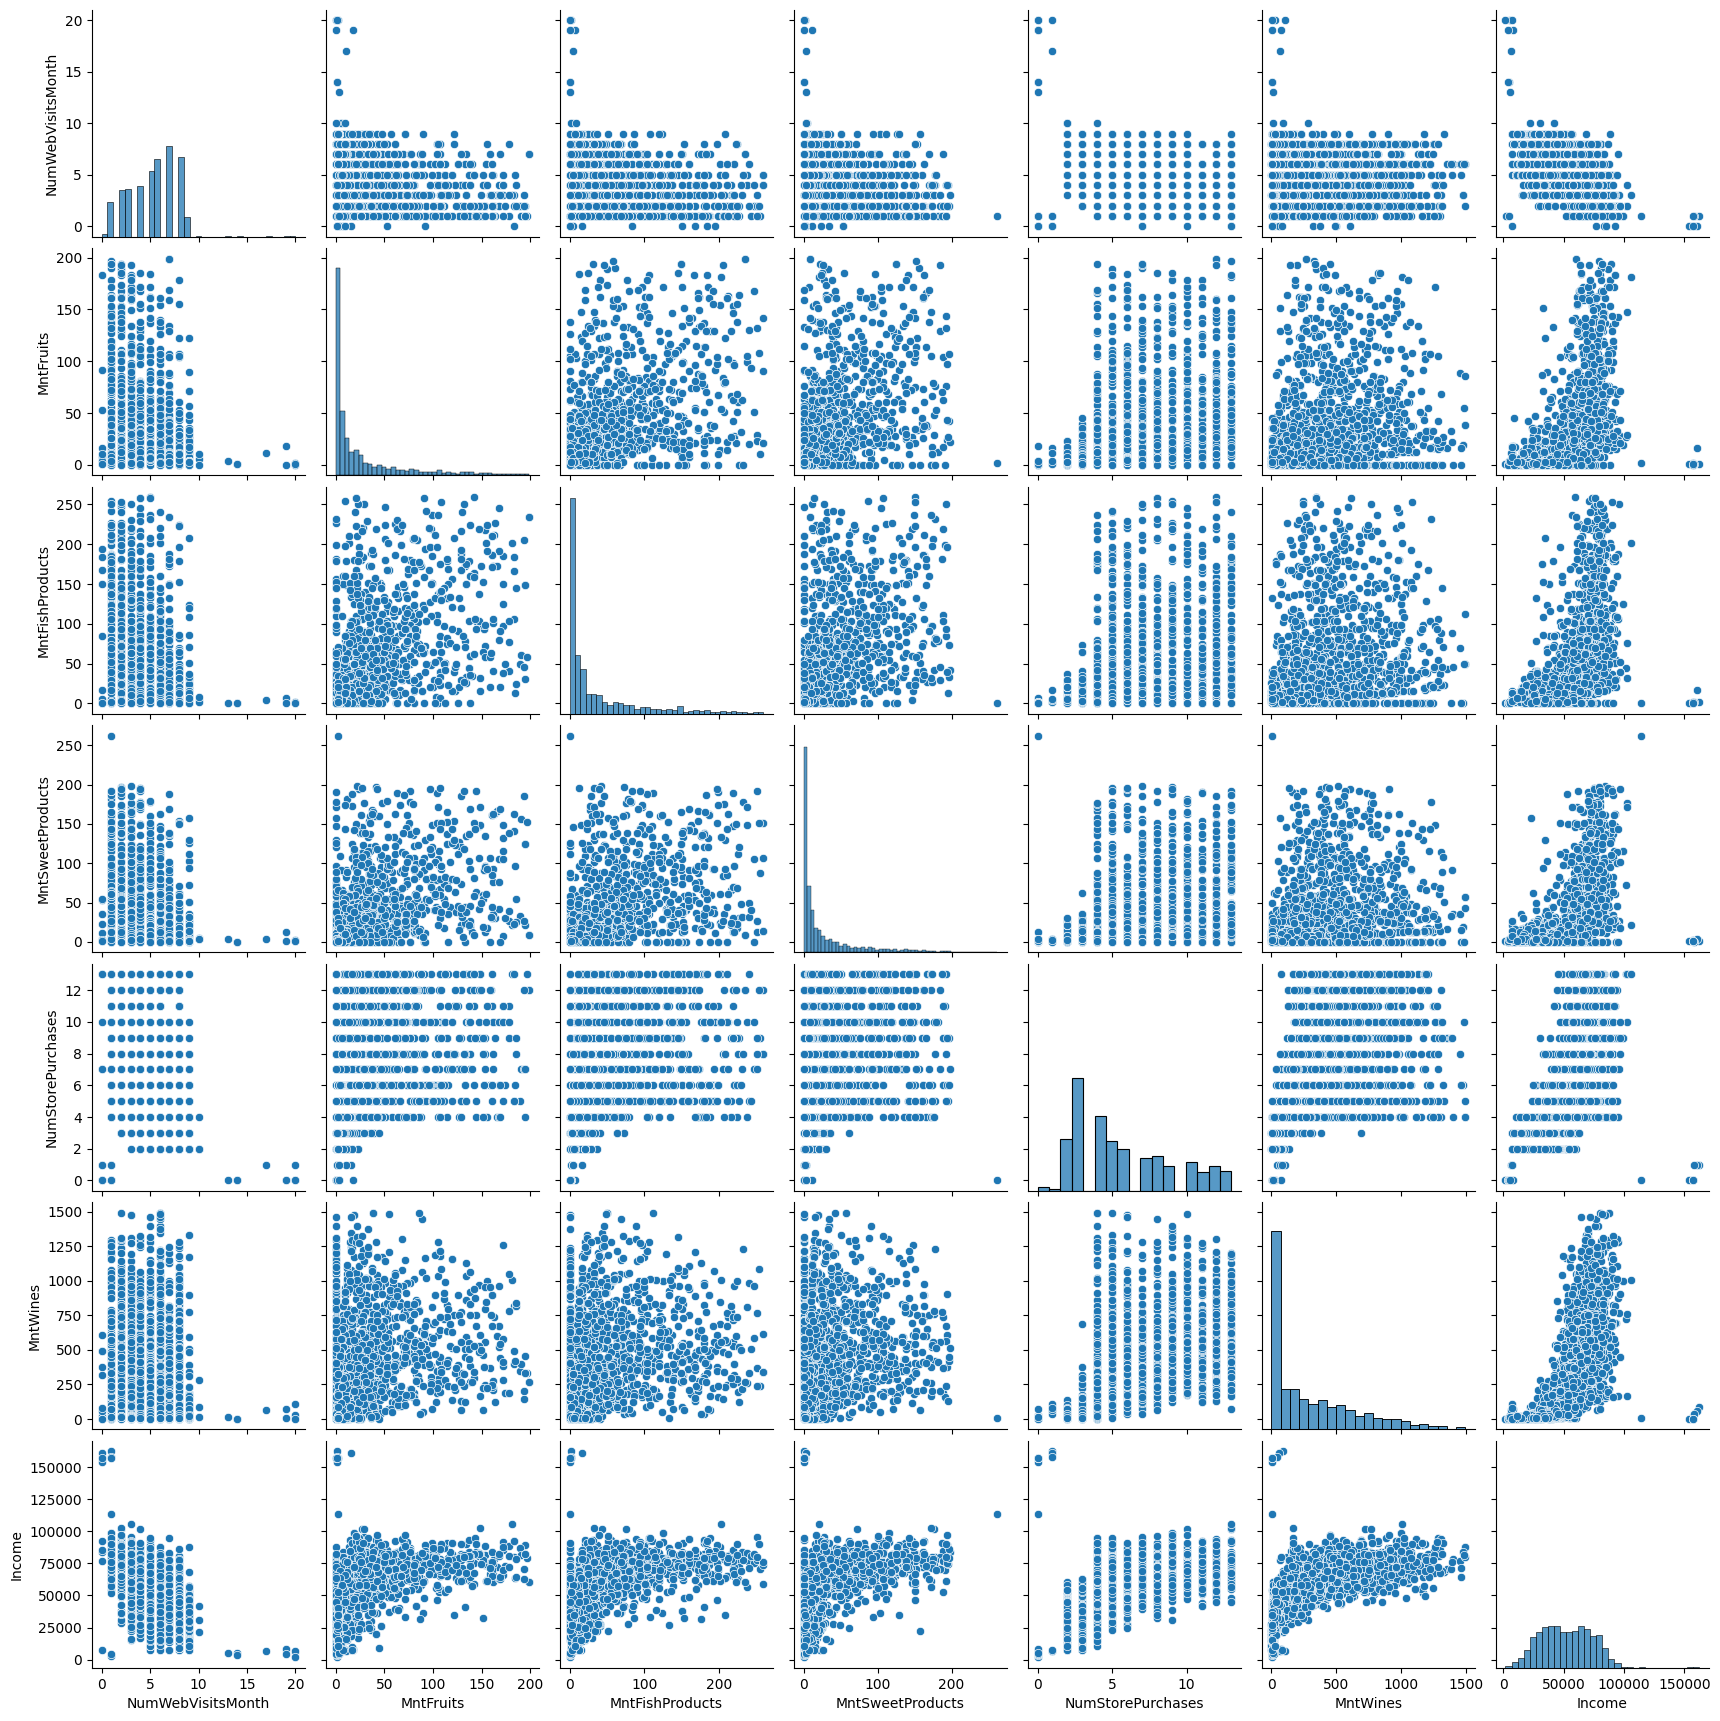

In [125]:
X2 = dfTreino[['NumWebVisitsMonth',
                'MntFruits',
                'MntFishProducts',
                'MntSweetProducts',
                'NumStorePurchases',
                'MntWines',
                'Income']]
import seaborn as sns
#pairplot
sns.pairplot(X2)

In [126]:
# em uma documentação sugere transformar as colunas que n tem relação linear usando logaritmo 
#X2.MntMeatProducts = np.log(X2.MntMeatProducts)

Identificamos que não há uma relação linear forte perceptível entre as variáveis exibidas com relação a "Income". 

## 03.2..  PIPELINE POLYNOMIAL FEATURES

In [127]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [128]:
def aplica_polynomial(x_train, x_test, grau=2):
  pf = PolynomialFeatures(degree=grau)
  x_train_pf = pf.fit_transform(x_train)
  x_test = pf.transform(x_test)
  return x_train_pf, x_test

def aplica_modelo(x_train, y_train, x_test, y_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yhat = lr.predict(x_test)

  print('Coeficientes: ', lr.coef_)
  print('Intercepto: ', lr.intercept_)

  print('Score de Treino (lr): ', lr.score(x_train, y_train))
  print('Score de Teste (lr): ', lr.score(x_test, y_test))
  return yhat

def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  ax = sns.distplot(y_test, hist=False, label='Valor atual' )
  sns.distplot(yHat, color='r', hist=False, label='Valor calculado' )
  plt.show()

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()

def Pipeline_Regressao_Polinomial(X, Y, grau=2):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)
  x_train_pf, x_test_pf = aplica_polynomial(x_train, x_test, grau)
  yHat = aplica_modelo(x_train_pf, y_train, x_test_pf, y_test)
  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(yHat, y_test)
  print('---------------------------\n ')


In [129]:
X = dfTreino[listaElementos]
Y = dfTreino['Income']

Coeficientes:  [    0.         -3514.44549757    25.22171237    15.05045899
    52.52592168   595.51129179    26.88505201]
Intercepto:  56376.019051612246
Score de Treino (lr):  0.7096958789811254
Score de Teste (lr):  0.7020631781524954
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.7020631781524954
MAE:  8436.014011939054
MSE:  143820205.1932156


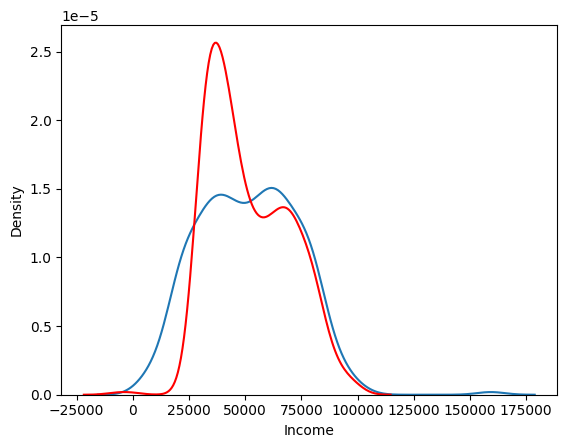

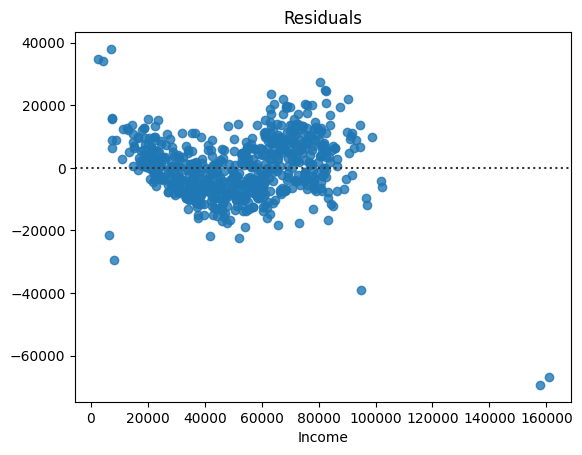

---------------------------
 
Coeficientes:  [ 4.55080633e-08 -8.82828269e+03 -8.43858942e+00 -3.50157230e+01
  6.90005823e+01 -4.01682738e+03  7.20390259e+01  2.65118753e+02
 -1.61980690e+00 -1.72395764e+00 -2.66262866e+00  4.32822220e+02
  5.42393452e-01 -5.59816885e-02 -1.11768985e-01 -2.55334142e-02
  5.96243997e+00 -3.81633848e-03  8.43744059e-02 -5.15236878e-01
  7.22510293e+00  1.90954375e-02  2.29592953e-01  2.13275167e+00
 -4.69536891e-02  1.53452023e+02 -2.28071360e+00 -2.60605026e-02]
Intercepto:  80389.43961160857
Score de Treino (lr):  0.7613674641461977
Score de Teste (lr):  0.7233654363735837
Resultados Polinomial Grau: 2

Resultado Conjunto de Teste:
R2 Score:  0.7233654363735837
MAE:  7924.884990657127
MSE:  133537168.91244365


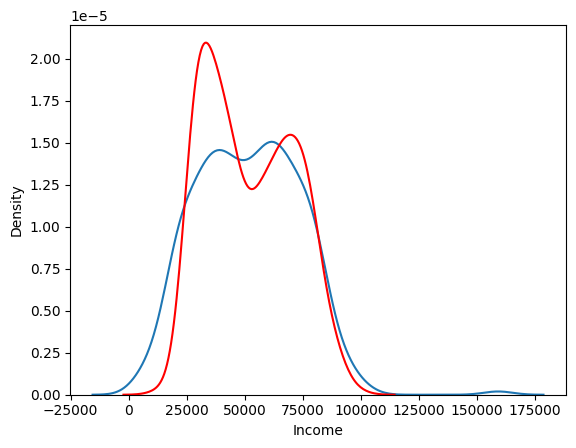

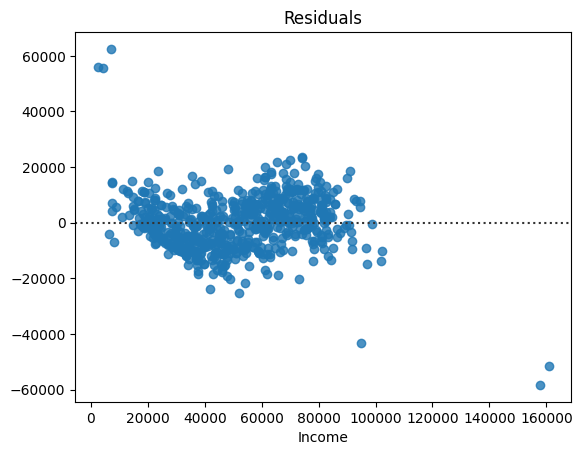

---------------------------
 
Coeficientes:  [-2.89999762e-04 -2.38251734e+04  1.81720596e+02 -1.84660337e+02
 -2.07290929e+02 -3.01109640e+04  2.06545266e+02  1.54391591e+03
 -3.68991855e+01  3.38224109e+01 -9.90055808e+00  3.62379976e+03
 -2.72510249e+00 -2.80129551e+00  2.93688371e-01  2.46570665e+00
  1.58800139e+01 -1.59577637e-01  6.71537515e-01 -1.58879135e+00
  1.61004030e+01  9.34447393e-02 -4.21202608e-01  9.28699894e+01
 -4.44547753e-01  2.94041313e+03 -1.61463344e+01 -1.67494055e-01
 -3.56727353e+01  8.47843299e-02 -2.11795233e+00  8.74069470e-01
 -8.81829567e+01 -2.89209351e-01  1.60423813e-01  1.20002144e-02
 -9.30323183e-02  5.53415741e-01  1.68917896e-02 -3.59994996e-02
  5.88965402e-02 -2.47008471e+00  1.66057877e-02  2.50749910e-02
 -1.43492241e+00  1.79247614e-02 -1.56068575e+02  8.32706100e-02
  2.15165068e-03  7.27877777e-03  4.53702005e-03 -5.11414344e-03
  1.19268230e-02  3.98529078e-05 -4.01034782e-03  1.29602071e-03
 -5.59118395e-02  2.11592809e-04 -1.95332795e

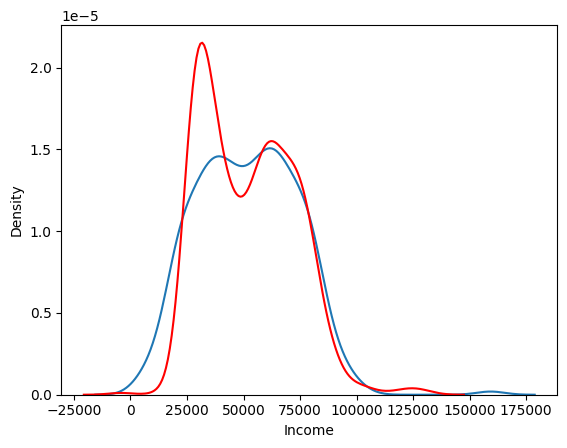

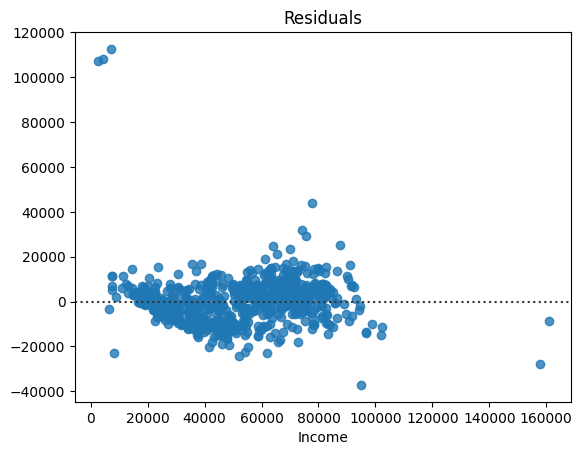

---------------------------
 
Coeficientes:  [-2.29795157e+00 -3.28641159e+04 -1.13683270e+03 -3.56541898e+02
  3.93897919e+02 -4.91799183e+04  4.96455529e+02  2.97158873e+03
  1.56793411e+02 -1.15439536e+02 -7.72541596e+01  9.07600903e+03
 -3.53506675e+01  2.86551931e+00 -4.91568953e+00 -2.95384481e+00
  4.09476142e+02  2.33694193e-01  3.82486397e+00  1.94988531e+00
  1.54518744e+02 -1.08776352e+00 -8.88001665e+00  2.37926492e+01
 -6.38571502e-01  5.97761366e+03 -4.23456599e+01 -8.16556519e-01
 -1.37229733e+02 -1.75778224e+01  2.22301209e+01 -3.86139248e+00
 -4.19589518e+02 -3.36888332e-01 -1.40466000e+00  7.21901444e-01
  4.46581960e-01 -1.84557219e+01  6.30857418e-02  8.43935889e-01
 -1.06059325e+00 -8.16058499e+00  1.37155527e-01  1.83439916e+00
  2.45405643e+00  5.25294785e-02 -8.89255142e+02  4.36135572e+00
  3.29153061e-02 -6.98089433e-03 -1.19750285e-02  4.06032683e-02
 -6.88180856e-01  3.15392967e-03  3.84807343e-02 -1.86129021e-02
 -1.34396336e-01  6.51674725e-03  1.37455599e

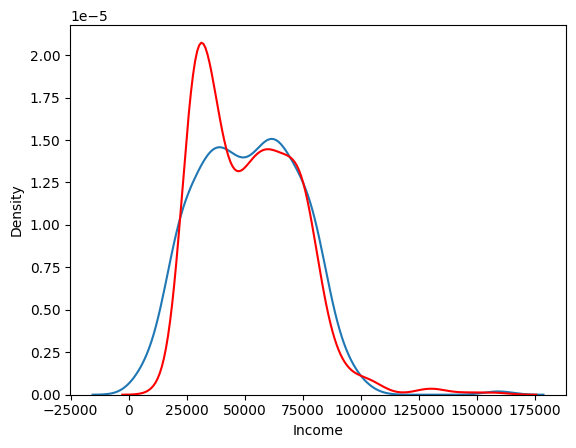

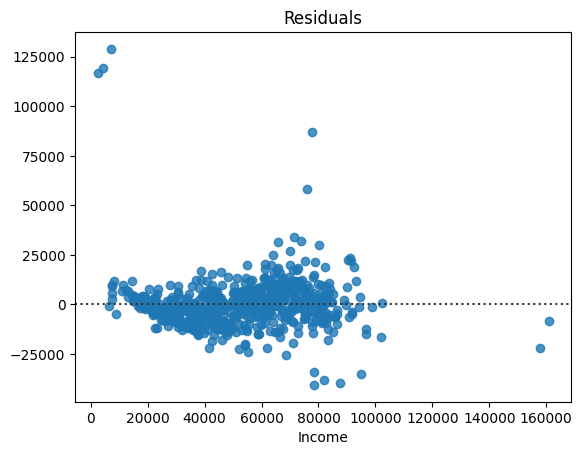

---------------------------
 
Coeficientes:  [-2.78054082e-03 -9.67105290e+03  1.50882396e+03  1.84495154e+03
  2.11183102e+03 -6.19079696e+03  2.76146927e+02 -8.45309894e+03
 -2.18925041e+02 -1.78258786e+03 -4.69494740e+02 -6.45202767e+03
  1.79431920e+02  9.05874564e+01 -9.69772505e+01 -9.75620242e+01
 -6.87784656e+02  1.11699794e+00 -3.09676152e+01  8.37927757e+01
  4.44648085e+02 -2.42369054e+00 -3.69114812e+01 -1.11165958e+03
  7.30150301e-01 -8.54153829e+03  1.45791436e+02 -2.77703296e+00
  1.79195725e+03 -8.66745792e+01  3.67617011e+02  1.73899452e+01
  4.24172148e+03 -5.64015380e+01 -1.26860044e+01  1.97554899e+01
 -5.50931127e+00  1.60814430e+02  1.11362926e-03  1.31430546e+01
 -8.03496834e+00  9.90715713e+01 -5.91064148e-01  9.18282761e+00
  1.39597300e+02  9.04534427e-01  1.78245314e+03 -4.69268242e+01
  2.34341287e-01 -4.22877269e-01  1.30935905e-01  2.85141732e-01
 -1.77469745e+01 -3.99978530e-02  4.40845669e-01  3.87766104e-01
  8.87212829e+00  8.31585643e-02  1.53591075e

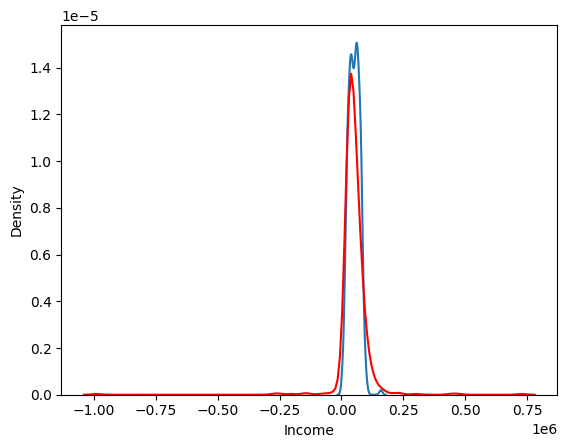

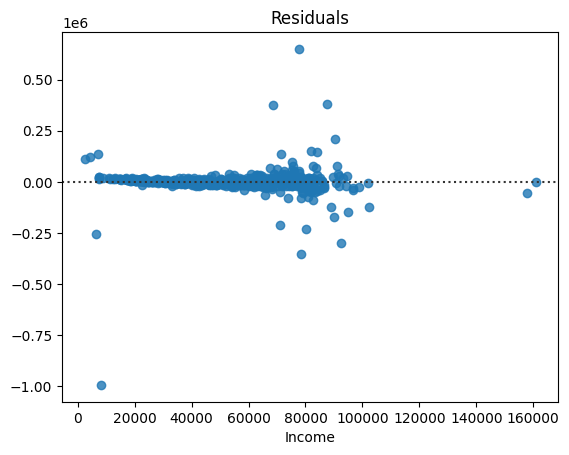

---------------------------
 
Coeficientes:  [-6.87301466e-02  1.68063394e-01 -6.09784431e-02  1.98229654e-03
 -7.05780263e-03  2.18427504e-02  9.45065857e-03 -7.61210855e-03
 -1.69522811e-02 -1.36076753e-02 -1.30518507e-02 -5.23019939e-03
  6.89246282e-02 -8.65984312e-03 -1.19347385e-02  6.50301205e-03
 -1.03724650e-02  3.04407536e-02  3.40523176e-03  2.29644859e-02
 -6.04757917e-03  5.25700048e-02  1.99762861e-02 -2.52388866e-03
  1.43072920e-01 -2.71482329e-03  6.14155238e-02  9.80704055e-01
 -4.91217715e-02 -8.52729048e-02 -1.01100630e-01 -6.54856468e-02
 -3.33984152e-02  1.61003578e-01  1.59029101e-02 -3.50757671e-02
  4.49794870e-02 -4.07250145e-02  1.19630418e-01  4.04963836e-02
  1.06256042e-01 -3.43686016e-02  1.02041086e-01  4.61293049e-02
 -2.78764010e-02  2.85535803e-01 -1.87678483e-02  1.23311273e-01
  8.29689331e-01 -8.84968062e-02 -5.50413281e-03 -5.71889304e-02
 -3.46772980e-02 -3.35062966e-02 -2.45677760e-01 -5.73574048e-02
 -5.46988099e-02  2.62093063e-01  6.07210767e

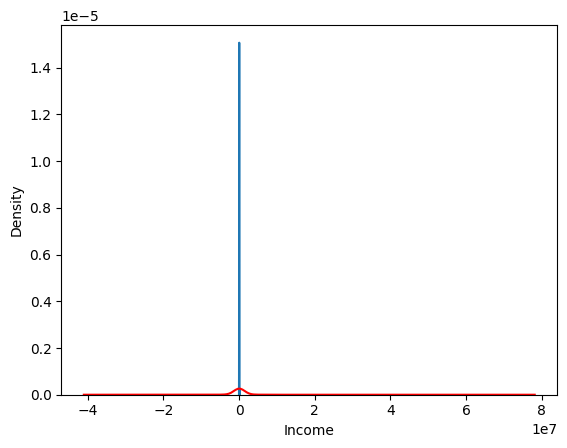

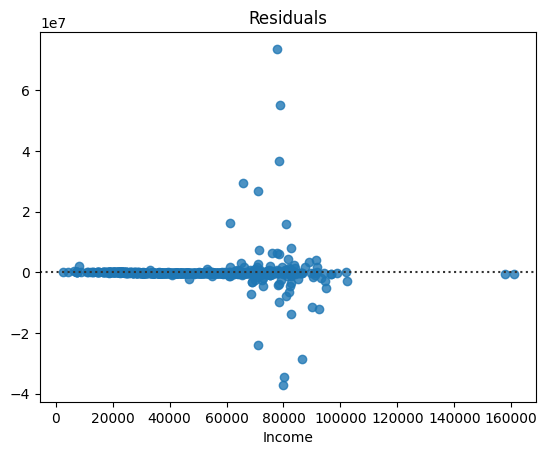

---------------------------
 
Coeficientes:  [ 1.06011467e-04  1.68598716e-06  1.08042338e-05 ...  1.62000075e-09
 -4.74245743e-12 -2.70258398e-14]
Intercepto:  36076.32421647303
Score de Treino (lr):  0.8000513912449088
Score de Teste (lr):  -29498637.1925821
Resultados Polinomial Grau: 7

Resultado Conjunto de Teste:
R2 Score:  -29498637.1925821
MAE:  19270372.11368682
MSE:  1.4239596742255168e+16


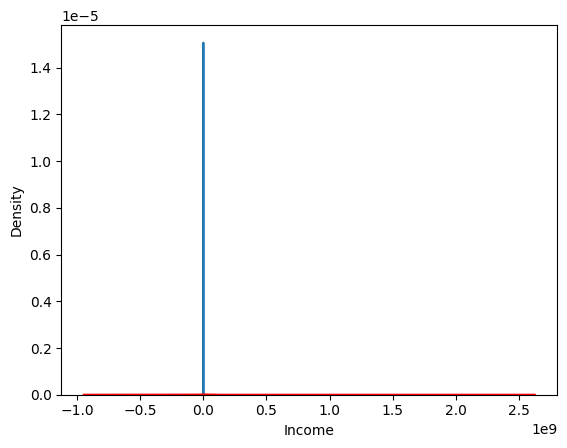

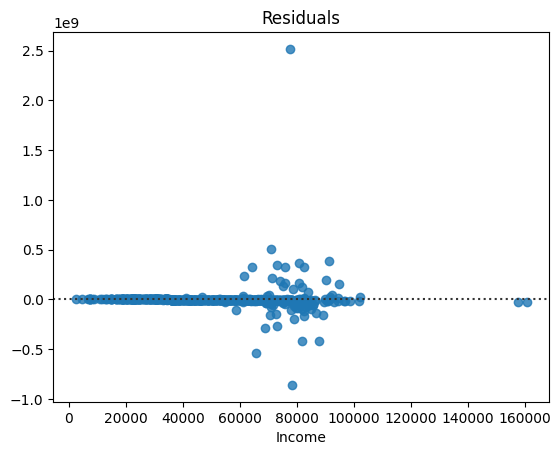

---------------------------
 
Coeficientes:  [-3.42993254e-08 -1.57202316e-09 -5.40641538e-10 ... -2.40664477e-12
  3.07061258e-14 -1.12944442e-16]
Intercepto:  35686.64180461981
Score de Treino (lr):  0.3361867268915727
Score de Teste (lr):  -333940529.6240235
Resultados Polinomial Grau: 8

Resultado Conjunto de Teste:
R2 Score:  -333940529.6240235
MAE:  49180397.50931401
MSE:  1.611999327201678e+17


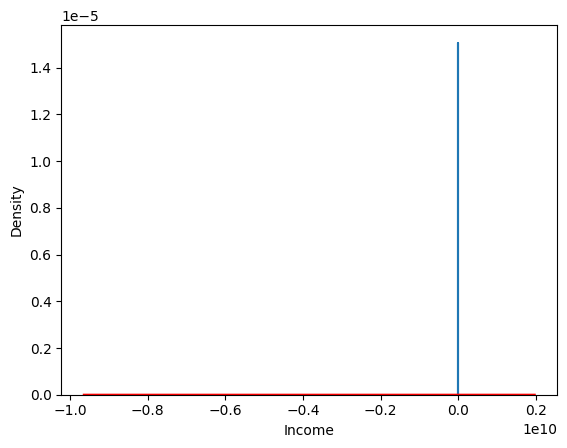

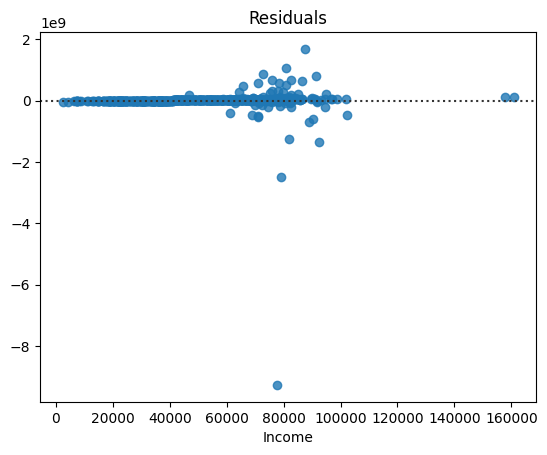

---------------------------
 
Coeficientes:  [-1.24174119e-11  2.37016068e-13  1.64416686e-12 ... -1.09880687e-14
  8.01255364e-17 -2.00003361e-19]
Intercepto:  35779.84157118865
Score de Treino (lr):  -0.31594291312221734
Score de Teste (lr):  -2103067984.0227828
Resultados Polinomial Grau: 9

Resultado Conjunto de Teste:
R2 Score:  -2103067984.0227828
MAE:  78248939.46528833
MSE:  1.0151939839650687e+18


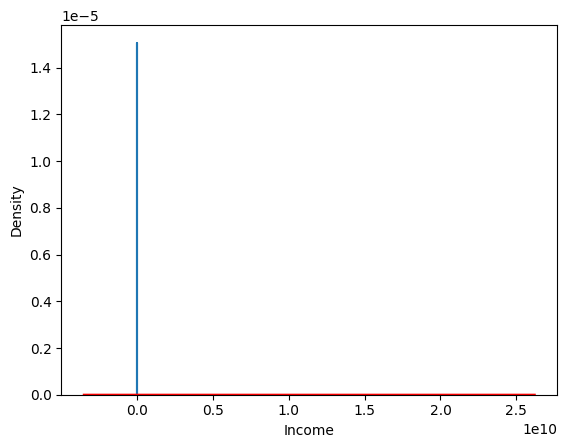

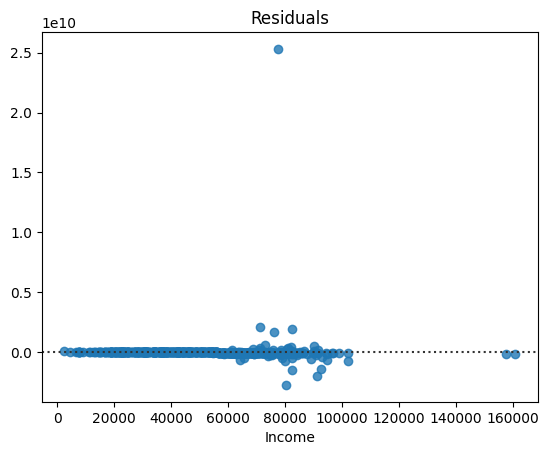

---------------------------
 


In [130]:
pf_lr = []
for i in range(1, 10):
  Pipeline_Regressao_Polinomial(X, Y, i)

## 03.3.. PIPELINE SCALE:

In [155]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [156]:
def aplica_polynomial(x_train, x_test, grau=1):
  pf = PolynomialFeatures(degree=grau)
  x_train_pf = pf.fit_transform(x_train)
  x_test = pf.transform(x_test)
  return x_train_pf, x_test, pf

def aplica_modelo(x_train, y_train, x_test, y_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yhat = lr.predict(x_test)

  print('Coeficientes: ', lr.coef_)
  print('Intercepto: ', lr.intercept_)
  print('Score de Treino (lr): ', lr.score(x_train, y_train))
  print('Score de Teste (lr): ', lr.score(x_test, y_test))
  return yhat, lr

def scaler(x_train, x_test):
    std_scaler = StandardScaler()
    x_train_std = std_scaler.fit_transform(x_train)
    x_test_std = std_scaler.transform(x_test)
    return x_train_std, x_test_std


def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)
  
  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  ax = sns.distplot(y_test, hist=False, label='Valor atual' )
  sns.distplot(yHat, color='r', hist=False, label='Valor calculado' )
  plt.show()

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()


def Pipeline_Regressao_Scale_Polinomial(X, Y, grau=2):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)
  #aplica regularização
  x_train_std, x_test_std = scaler(x_train, x_test) 
  #aplica polinomial
  x_train_pf, x_test_pf, pf = aplica_polynomial(x_train_std, x_test_std, grau)
  #aplica modelo
  yHat, lr = aplica_modelo(x_train_pf, y_train, x_test_pf, y_test) 

  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(yHat, y_test)
  print('---------------------------\n')
  return lr, pf



Resultado antes de aplicar o Scaling (grau 1): 

Coeficientes:  [    0.         -2867.21928253    96.27069983     9.08533872
    -7.17308172    34.65497578   676.61996607    19.35597015
    16.67470055   954.19100885]
Intercepto:  51197.10359168041
Score de Treino (lr):  0.7354459185331849
Score de Teste (lr):  0.7146877957147756
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.7146877957147756
MAE:  8174.02978143959
MSE:  137726043.76317143

Coeficientes:  [ 6.73287142e-13 -7.42893023e+03  1.36436700e+03 -9.18403915e+02
 -1.10579519e+03  1.52888761e+03 -9.51008991e+02  1.57815619e+04
  7.27089185e+03 -2.33453022e+03  1.17968550e+03  1.25041843e+03
 -1.73404647e+02 -5.24828289e+02 -7.10248872e+02  2.42913874e+03
 -4.60516763e+02  1.76277522e+03  1.34582597e+03  4.69371295e+01
  3.81377013e+02 -3.81598838e+02  9.61671559e+02 -7.56465358e+02
  2.65747244e+03  1.97709160e+03 -2.35376125e+03  1.36647318e+02
 -1.09331287e+02  3.89017368e+02  1.15563280e+03 -1.53516565e+02
 -8.33690780e+02  7.48406884e+02  3.53213679e+02 -7.98841943e+02
  8.59941022e+02  4.73409768e+02 -1.25286357e+03  4.40484552e+02
  3.80177839e+02 -2.51926077e+02  3.12926388e+02 -2.16086322e+02
 -4.97729815e+02  7.19639246e+02 -2.35087135e+03  3.38970956e+02
  1.01042578e+03 -1.96344802e+03 -2.08832711e+03 -1.75831343e+03
  8.58509532e+02  9.74454647e+01  5.81595693e+02]
Intercepto:  55460.544864672425
Score de Treino (lr):  0.8052227413867032
Score de Teste (

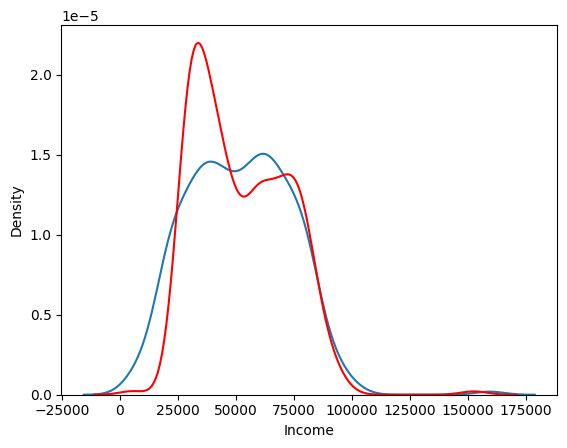

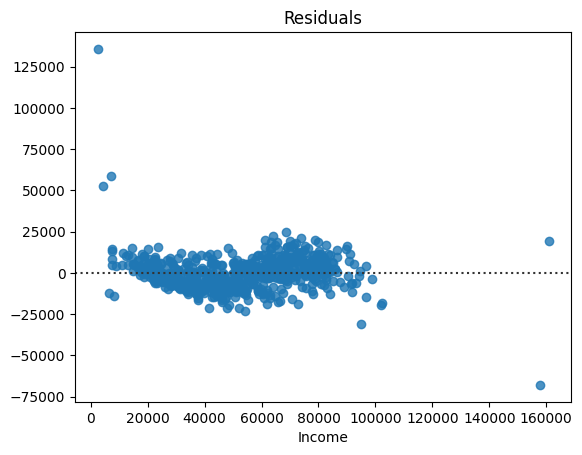

---------------------------



In [157]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
Y = dfTreino['Income']

lr, pf = Pipeline_Regressao_Scale_Polinomial(X, Y, grau=2)

In [134]:
lr.coef_

array([ 1.06295615e-13, -8.40642312e+03,  3.54644492e+02, -3.72127255e+02,
        1.87719760e+03, -3.82777497e+02,  1.52025930e+04,  1.55186051e+03,
       -1.58939831e+02, -2.27354582e+02, -2.66880227e+02,  3.41156151e+03,
        4.45443998e+02, -9.20815805e+01, -2.47090300e+02, -4.29014486e+01,
        7.87816270e+02, -5.25391242e+01,  2.50699077e+02, -1.16353010e+03,
        1.28307659e+03,  3.53324029e+02,  3.94055972e+02,  2.87857474e+02,
       -6.60301002e+02,  1.62872476e+03, -2.52220771e+03, -3.00281033e+03])

In [135]:
pf

PolynomialFeatures()

# 03.4.. PIPELINE RIDGE e LASSO

In [136]:
def aplica_polynomial(x_train, x_test, grau=1):
  pf = PolynomialFeatures(degree=grau)
  x_train_pf = pf.fit_transform(x_train)
  x_test = pf.transform(x_test)
  return x_train_pf, x_test

def scaler(x_train, x_test):
    std_scaler = StandardScaler()
    x_train_std = std_scaler.fit_transform(x_train)
    x_test_std = std_scaler.transform(x_test)
    return x_train_std, x_test_std


def aplica_modelo_lr(x_train, y_train, x_test, y_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yhat = lr.predict(x_test)

  #print('Coeficientes (lr): ', lr.coef_)
  #print('Intercepto (lr): ', lr.intercept_)
  print('=== LR ===')
  print('Score de Treino (lr): ', lr.score(x_train, y_train))
  print('Score de Teste (lr): ', lr.score(x_test, y_test))
  


def ridge(alpha, x_train_std, y_train, x_test_std, y_test):
    ridge_r = Ridge(alpha)
    ridge_r.fit(x_train_std, y_train)
    print('=== Ridge ===')
    print('[Ridge] mostrando o alpha atual: ', alpha) 
    print('Score de Treino (RIDGE): ', ridge_r.score(x_train_std, y_train))
    print('Score de Teste (RIDGE): ', ridge_r.score(x_test_std, y_test))

    y_hat_r = ridge_r.predict(x_test_std)
    return y_hat_r


def lasso(alpha, x_train_std, y_train, x_test_std, y_test):
    lasso_r = Lasso(alpha)
    lasso_r.fit(x_train_std, y_train)

    print('=== Lasso ===')
    print('[Lasso] mostrando o alpha atual: ', alpha) 
    print('Score de Treino (LASSO): ', lasso_r.score(x_train_std, y_train))
    print('Score de Teste (LASSO): ', lasso_r.score(x_test_std, y_test))
    y_hat_l = lasso_r.predict(x_test_std)
    return y_hat_l

def evaluate_model(yHat, y_test):
  
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  ax = sns.distplot(y_test, hist=False, label='Valor atual' )
  sns.distplot(yHat, color='r', hist=False, label='Valor calculado' )
  plt.show()

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()

def Pipeline_Ridge(X, Y, grau=1, alpha = 10):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)
  x_train_std, x_test_std = scaler(x_train, x_test)
  
  x_train_pf, x_test_pf = aplica_polynomial(x_train_std, x_test_std, grau)
  y_hat_r = ridge(alpha, x_train_std, y_train, x_test_std, y_test)

  #compara com lr
  aplica_modelo_lr(x_train_pf, y_train, x_test_pf, y_test)
  
  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(y_hat_r, y_test)
  print('---------------------------\n')
  

def Pipeline_Lasso(X, Y, grau=1, alpha = 10):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)
  x_train_std, x_test_std = scaler(x_train, x_test)
  
  x_train_pf, x_test_pf = aplica_polynomial(x_train_std, x_test_std, grau)
  y_hat_l = lasso(alpha, x_train_std, y_train, x_test_std, y_test)

  #compara com lr
  aplica_modelo_lr(x_train_pf, y_train, x_test_pf, y_test)


  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(y_hat_l, y_test)
  print('---------------------------\n')



# RIDGE

=== Ridge ===
[Ridge] mostrando o alpha atual:  100
Score de Treino (RIDGE):  0.7083106965640418
Score de Teste (RIDGE):  0.701558256949667
=== LR ===
Score de Treino (lr):  0.7096958789811254
Score de Teste (lr):  0.7020631781524957
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.701558256949667
MAE:  8432.633256699484
MSE:  144063940.99782977


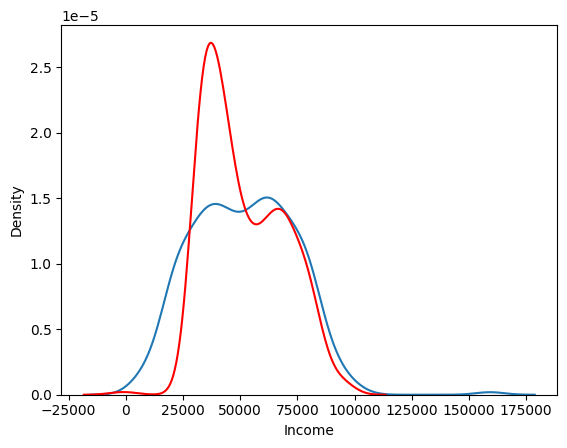

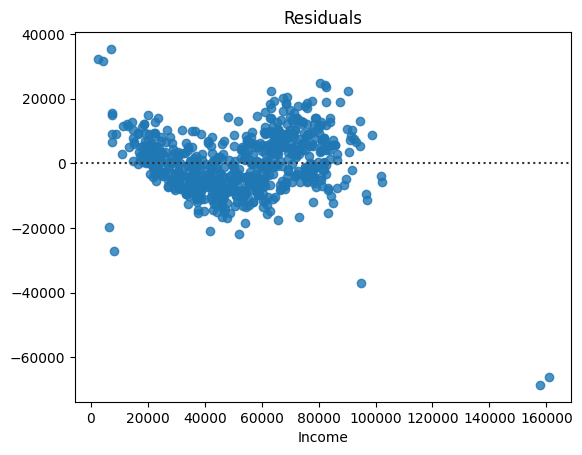

---------------------------



In [137]:
X = dfTreino[listaElementos]
Y = dfTreino['Income']

#alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 100] 

Pipeline_Ridge(X, Y, 1, 100)

#for a in alpha_ridge:
#    print('TESTE (alpha ridge = ', a, ')')
#    Pipeline_Ridge(X, Y, 2, a)

# LASSO

=== Lasso ===
[Lasso] mostrando o alpha atual:  100
Score de Treino (LASSO):  0.7352416670791573
Score de Teste (LASSO):  0.71531109008422
=== LR ===
Score de Treino (lr):  0.7354459185331849
Score de Teste (lr):  0.7146877957147753
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.71531109008422
MAE:  8165.334165127623
MSE:  137425166.8069315


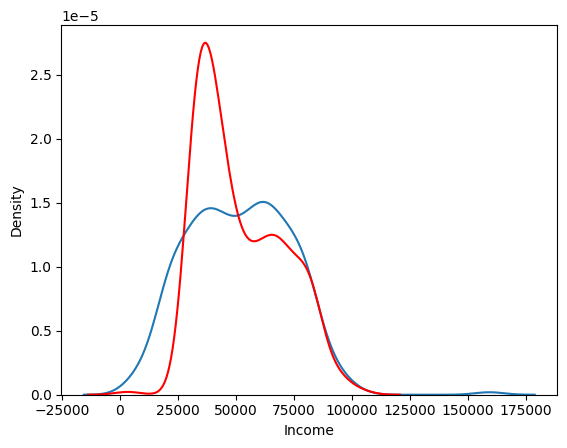

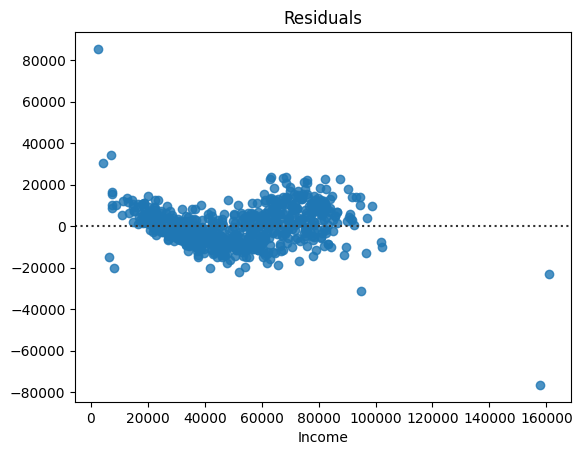

---------------------------



In [138]:
X = dfTreino[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]
Y = dfTreino['Income']

""" X = dfTreino[listaElementos]
Y = dfTreino['Income'] """

Pipeline_Lasso(X, Y, 1, 100)

# alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 100] 
# for a in alpha_ridge:
#     print('TESTE: ', a)
#     Pipeline_Lasso(X, Y, 1, alpha = a)


# LASSO CROSS VALIDATION

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)
x_train_std, x_test_std = scaler(x_train, x_test)


In [140]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 400], random_state=0).fit(x_train_std, y_train)

#score
print(lasso_cv.score(x_train_std, y_train))
print(lasso_cv.score(x_test_std, y_test))

0.7351188071723408
0.7149446197379541


## Aplicando predição usando elementos obtidos por Lasso Cross Validation

In [141]:
lasso_cv.intercept_

52112.02258064516

In [142]:
len(lasso_cv.coef_)

9

In [143]:
dfEstimar = df[df['Income'].isnull()] #estimar: com elementos de income faltantes
dfToPredict = dfEstimar[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]

In [144]:
yHatPredicted = lasso_cv.predict(dfToPredict)

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [145]:
len(yHatPredicted)

24

In [146]:
dfEstimar['Income']=yHatPredicted

/var/folders/4n/trm88tt51x191mqx096fk0zm0000gn/T/ipykernel_7839/2522713788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEstimar['Income']=yHatPredicted


In [147]:
dfEstimar['Income'] = dfEstimar['Income'].astype('int')

/var/folders/4n/trm88tt51x191mqx096fk0zm0000gn/T/ipykernel_7839/1803860640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEstimar['Income'] = dfEstimar['Income'].astype('int')


In [148]:
dfEstimar

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,IncomeMonth,TotAcceptedCmp,Age,Days_Registered,Education_Cat,Marital_Status_Cat
10,1994,Graduation,Married,66352,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,NaN,0,31,226,2,3
27,5255,Graduation,Single,425545,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,NaN,0,28,494,2,4
43,7281,PhD,Single,766986,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,NaN,0,55,236,4,4
48,7244,Graduation,Single,521916,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,NaN,0,63,179,2,4
58,8557,Graduation,Single,171905,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,NaN,0,32,377,2,4
71,10629,2n Cycle,Married,327911,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,NaN,0,41,653,0,3
90,8996,PhD,Married,2258470,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,NaN,0,57,587,4,3
91,9235,Graduation,Single,83106,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,NaN,0,57,33,2,4
92,5798,Master,Together,4308057,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0,NaN,0,41,218,3,5
128,8268,PhD,Married,2413458,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,NaN,0,53,353,4,3


# APLICANDO REGRESSÃO aos elementos faltantes

In [158]:
dfEstimar = df[df['Income'].isnull()] #estimar: com elementos de income faltantes

In [159]:
dfToPredict = dfEstimar[['NumWebVisitsMonth', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumStorePurchases', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases']]

In [160]:
dfToPredict_pf = pf.transform(dfToPredict)

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [161]:
dfToPredict_pf

array([[1.000000e+00, 7.000000e+00, 1.000000e+00, ..., 3.600000e+01,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 9.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.000000e+00, 0.000000e+00, ..., 2.500000e+03,
        1.500000e+02, 9.000000e+00],
       ...,
       [1.000000e+00, 7.000000e+00, 0.000000e+00, ..., 4.410000e+02,
        2.100000e+01, 1.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.401000e+05,
        2.450000e+03, 2.500000e+01],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.582449e+06,
        0.000000e+00, 0.000000e+00]])

In [162]:
yHatPredicted = lr.predict(dfToPredict_pf)

In [163]:
yHatPredicted.shape

(24,)

In [164]:
dfEstimar['Income']=yHatPredicted

/var/folders/4n/trm88tt51x191mqx096fk0zm0000gn/T/ipykernel_7839/2522713788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEstimar['Income']=yHatPredicted


#!! Erro. Income negativo. Revisar. (2022-09-06) - ferkrum

In [ ]:
dfEstimar

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,IncomeMonth,TotAcceptedCmp,Age,Days_Registered,Education_Cat,Marital_Status_Cat
10,1994,Graduation,Married,1.875758e+05,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,NaN,0,31,226,2,3
27,5255,Graduation,Single,2.656868e+07,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,NaN,0,28,494,2,4
43,7281,PhD,Single,-1.901882e+07,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,NaN,0,55,236,4,4
48,7244,Graduation,Single,-6.161551e+06,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,NaN,0,63,179,2,4
58,8557,Graduation,Single,2.250090e+05,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,NaN,0,32,377,2,4
71,10629,2n Cycle,Married,-1.351165e+06,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,NaN,0,41,653,0,3
90,8996,PhD,Married,-1.723481e+08,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,NaN,0,57,587,4,3
91,9235,Graduation,Single,1.795184e+05,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,NaN,0,57,33,2,4
92,5798,Master,Together,-6.445719e+08,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0,NaN,0,41,218,3,5
128,8268,PhD,Married,-2.621982e+08,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,NaN,0,53,353,4,3


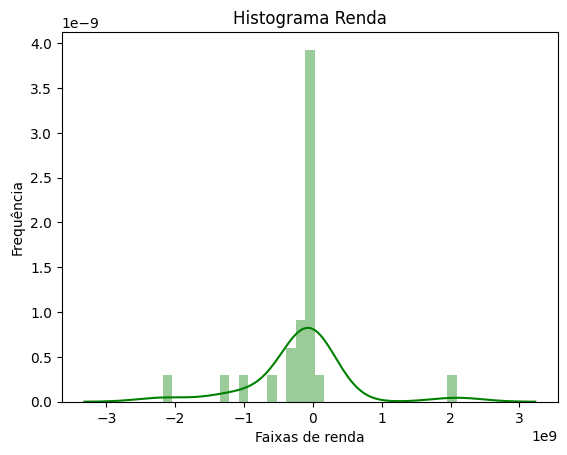

In [ ]:
sns.distplot(dfEstimar['Income'], color='green') #Density maior que 1 ???
plt.title('Histograma Renda')
plt.xlabel('Faixas de renda')
plt.ylabel('Frequência')
plt.show()